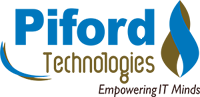

# VGGNET With Keras on Custom Dataset

In [21]:
from __future__ import print_function

import numpy as np
import warnings

from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import _obtain_input_shape # this will work for older versions of keras. 2.2.0 or before
from keras.engine.topology import get_source_inputs


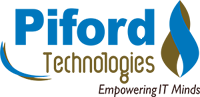

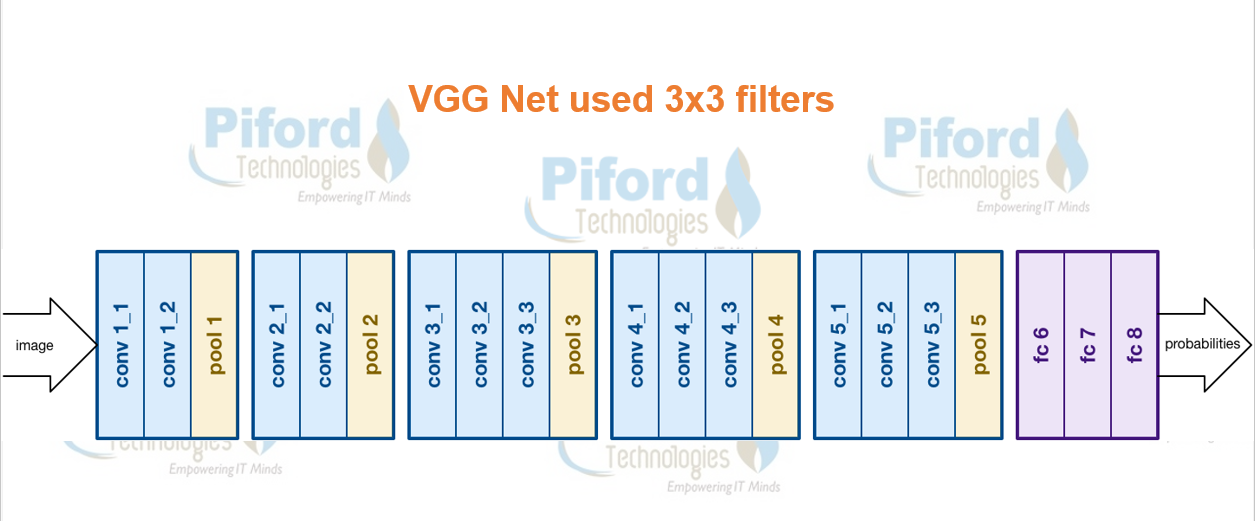

In [2]:
def VGGupdated(input_tensor=None,classes=2):    
   
    img_rows, img_cols = 300, 300   # by default size is 224,224
    img_channels = 3

    img_dim = (img_rows, img_cols, img_channels)
   
    img_input = Input(shape=img_dim)
    
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    
    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    # Create model.
   
     
    model = Model(inputs = img_input, outputs = x, name='VGGdemo')


    return model



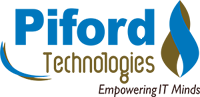

In [22]:
model = VGGupdated(classes = 2) # bedroom and diningroom

In [23]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('rooms_dataset')

room_types = os.listdir('rooms_dataset')
print (room_types)  #what kinds of rooms are in this dataset

print("Types of rooms found: ", len(dataset_path))



['bedroom', 'diningroom']
Types of rooms found:  2


In [30]:
rooms = []

for item in room_types:
 # Get all the file names
 all_rooms = os.listdir('rooms_dataset' + '/' +item)
 #print(all_shoes)

 # Add them to the list
 for room in all_rooms:
    rooms.append((item, str('rooms_dataset' + '/' +item) + '/' + room))
    print(rooms)



[('bedroom', 'rooms_dataset/bedroom/1.jpg')]
[('bedroom', 'rooms_dataset/bedroom/1.jpg'), ('bedroom', 'rooms_dataset/bedroom/10.jpg')]
[('bedroom', 'rooms_dataset/bedroom/1.jpg'), ('bedroom', 'rooms_dataset/bedroom/10.jpg'), ('bedroom', 'rooms_dataset/bedroom/11.jpg')]
[('bedroom', 'rooms_dataset/bedroom/1.jpg'), ('bedroom', 'rooms_dataset/bedroom/10.jpg'), ('bedroom', 'rooms_dataset/bedroom/11.jpg'), ('bedroom', 'rooms_dataset/bedroom/12.jpg')]
[('bedroom', 'rooms_dataset/bedroom/1.jpg'), ('bedroom', 'rooms_dataset/bedroom/10.jpg'), ('bedroom', 'rooms_dataset/bedroom/11.jpg'), ('bedroom', 'rooms_dataset/bedroom/12.jpg'), ('bedroom', 'rooms_dataset/bedroom/13.jpg')]
[('bedroom', 'rooms_dataset/bedroom/1.jpg'), ('bedroom', 'rooms_dataset/bedroom/10.jpg'), ('bedroom', 'rooms_dataset/bedroom/11.jpg'), ('bedroom', 'rooms_dataset/bedroom/12.jpg'), ('bedroom', 'rooms_dataset/bedroom/13.jpg'), ('bedroom', 'rooms_dataset/bedroom/14.jpg')]
[('bedroom', 'rooms_dataset/bedroom/1.jpg'), ('bedroom'

In [27]:
    
# Build a dataframe        
rooms_df = pd.DataFrame(data=rooms, columns=['room type', 'image'])
print(rooms_df.head())
#print(rooms_df.tail())


  room type                         image
0   bedroom   rooms_dataset/bedroom/1.jpg
1   bedroom  rooms_dataset/bedroom/10.jpg
2   bedroom  rooms_dataset/bedroom/11.jpg
3   bedroom  rooms_dataset/bedroom/12.jpg
4   bedroom  rooms_dataset/bedroom/13.jpg


In [32]:

# Let's check how many samples for each category are present
print("Total number of rooms in the dataset: ", len(rooms_df))

room_count = rooms_df['room type'].value_counts()

print("rooms in each category: ")
print(room_count)


Total number of rooms in the dataset:  40
rooms in each category: 
diningroom    20
bedroom       20
Name: room type, dtype: int64


In [35]:


import cv2
path = 'rooms_dataset/'


im_size = 300

images = []
labels = []

for i in room_types:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [36]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape    


(40, 300, 300, 3)

In [18]:

from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=rooms_df['room type'].values
#print(y[:5])

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [42]:
y=y.reshape(-1,1)
onehotencoder = OneHotEncoder(categorical_features=[0])  #Converted  scalar output into vector output where the correct class will be 1 and other will be 0
Y= onehotencoder.fit_transform(y)
Y.shape  #(40, 2)


C:\Users\Lenovo\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(40, 2)

In [20]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(38, 300, 300, 3)
(38, 2)
(2, 300, 300, 3)
(2, 2)


In [6]:

model.fit(train_x, train_y, epochs = 10, batch_size = 32)  

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
38/38 [==============================] - 57s 1s/step - loss: 1.4320 - acc: 0.5263
Epoch 2/10
38/38 [==============================] - 43s 1s/step - loss: 7.6349 - acc: 0.5263
Epoch 3/10
38/38 [==============================] - 45s 1s/step - loss: 7.6349 - acc: 0.5263
Epoch 4/10
38/38 [==============================] - 47s 1s/step - loss: 7.6349 - acc: 0.5263
Epoch 5/10
38/38 [==============================] - 44s 1s/step - loss: 7.6349 - acc: 0.5263
Epoch 6/10
38/38 [==============================] - 44s 1s/step - loss: 7.6349 - acc: 0.5263
Epoch 7/10
38/38 [==============================] - 44s 1s/step - loss: 7.6349 - acc: 0.5263
Epoch 8/10
38/38 [==============================] - 44s 1s/step - loss: 7.6349 - acc: 0.5263
Epoch 9/10
38/38 [==============================] - 44s 1s/step - loss: 7.6349 - acc: 0.5263
Epoch 10/10
38/38 [==============================] - 44s 1s/step - l

In [9]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
#print ("Test Accuracy = " + str(preds[1]))

2/2 [==============================] - 1s 317ms/step
Loss = 16.11809539794922


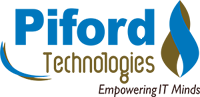

# Take input from User and Classify that image

Input image shape: (1, 300, 300, 3)


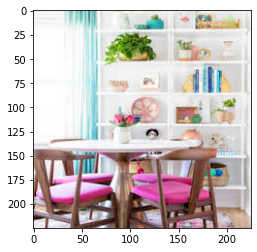

In [11]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow

img_path = 'test_img.jpg'

img = image.load_img(img_path, target_size=(300, 300))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [10]:
print(model.predict(x))

[[0. 1.]]
